In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import pylab
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

boston = load_boston()
bos = pd.DataFrame(boston.data,columns = boston.feature_names)
y = boston.target

In [2]:
## reading the description 
with open('boston-description.txt','w') as f:
    f.write(boston.DESCR)

In [3]:
bos.shape

(506, 13)

In [4]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [6]:
bos.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
## check the normaility of the data, do the traformation

def plot_data(df,feature):
    fig = plt.figure(figsize=(15,6))
    fig.suptitle(feature, fontsize=16)
    plt.subplot(1,3,1)
    df[feature].hist()
    plt.subplot(1,3,2)
    df[feature].plot.kde()
    plt.subplot(1,3,3)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

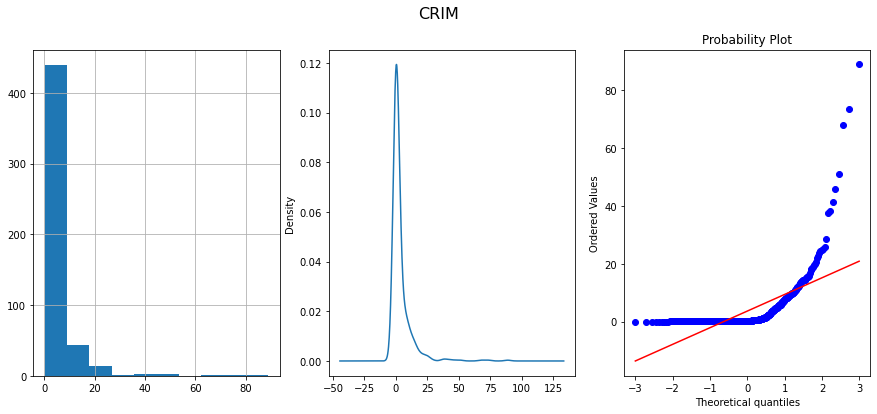

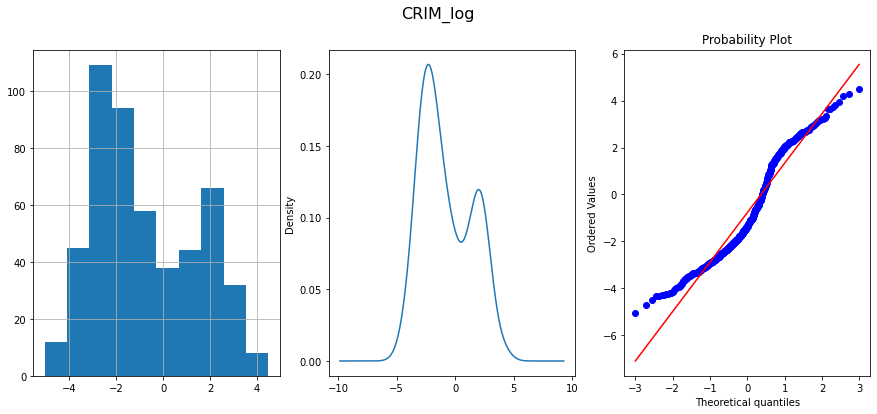

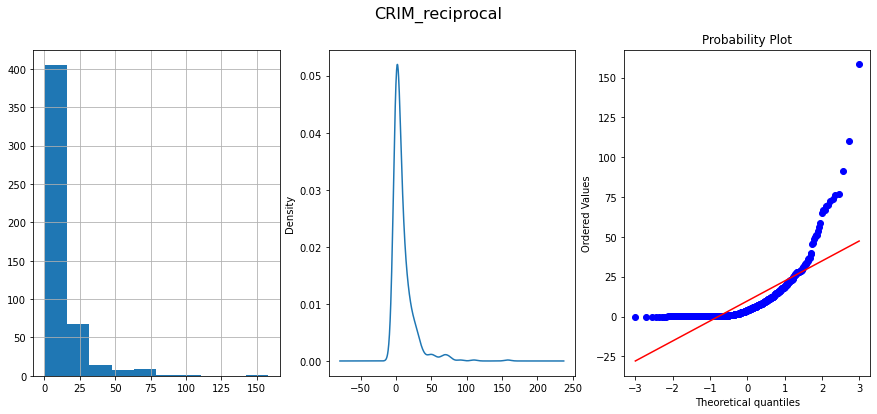

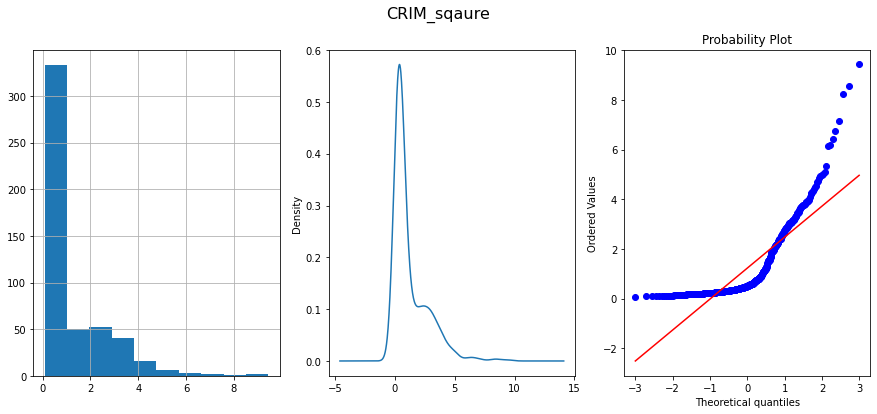

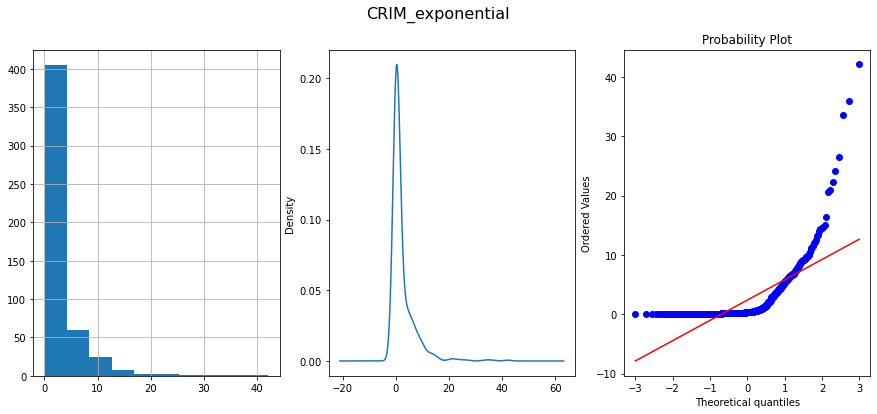

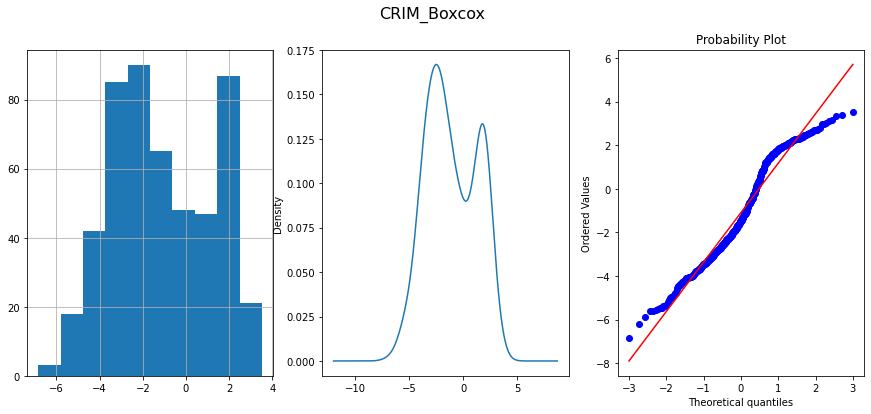

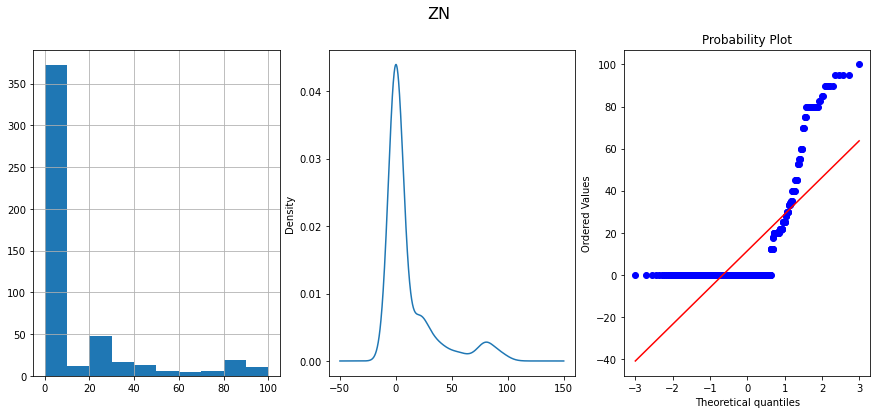

/home/hktikhin/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


supplied range of [-inf, 4.605170185988092] is not finite
supplied range of [0.01, inf] is not finite


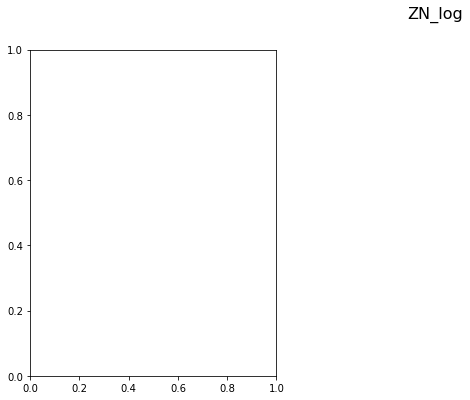

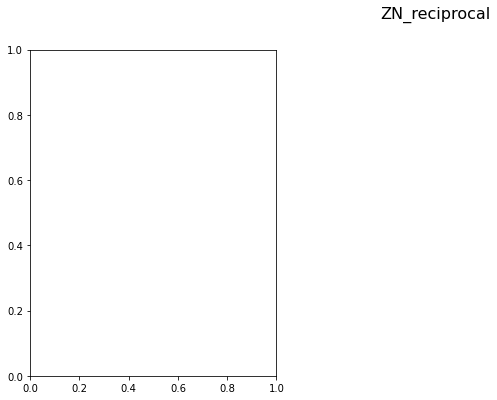

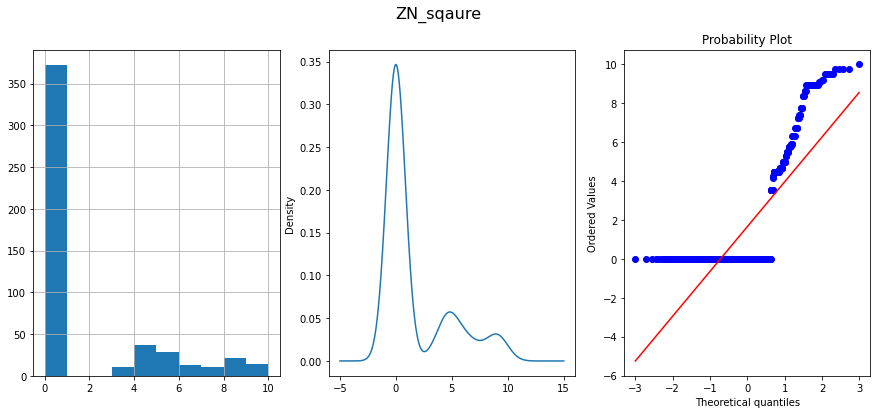

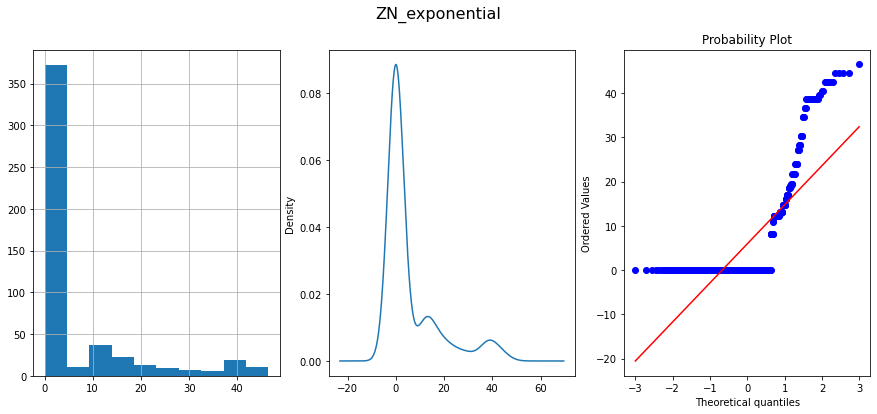

Data must be positive.


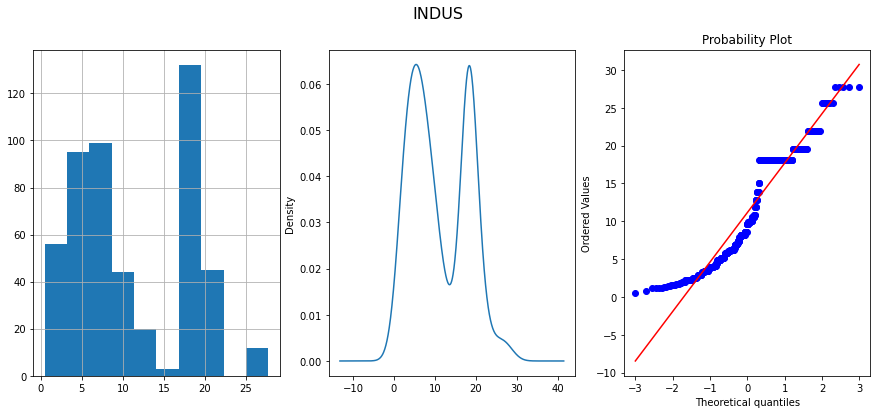

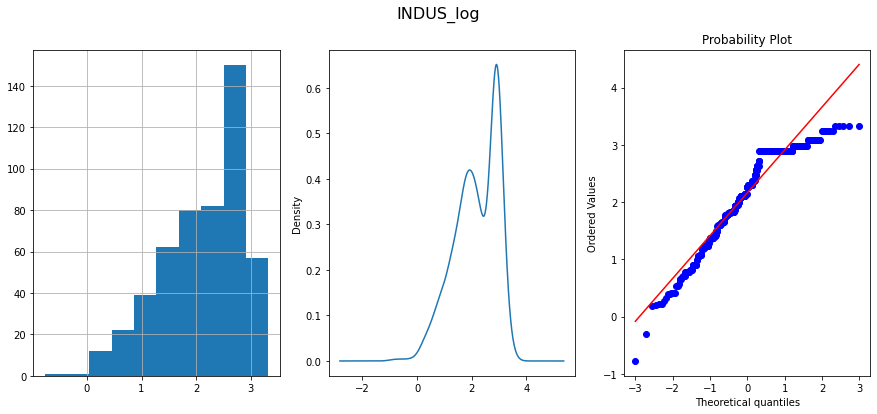

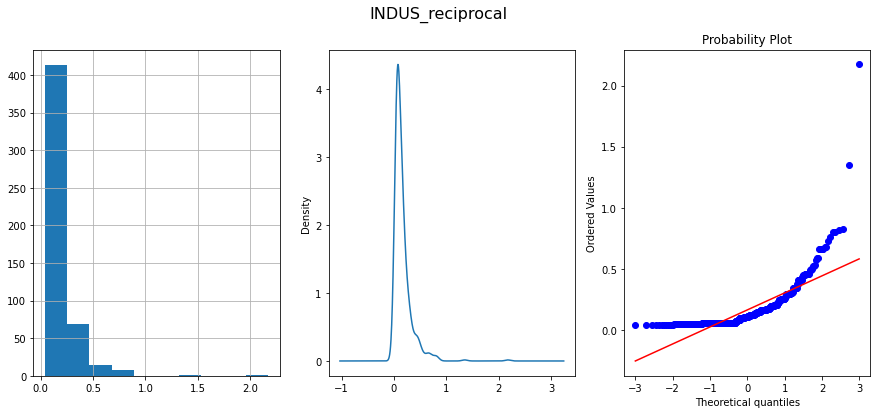

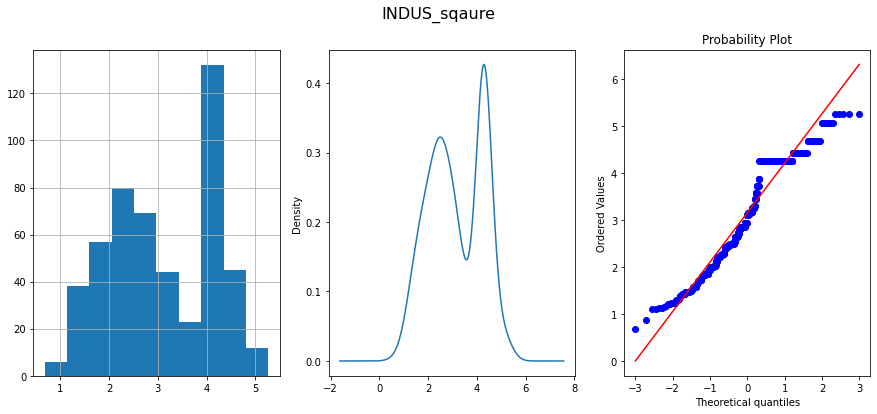

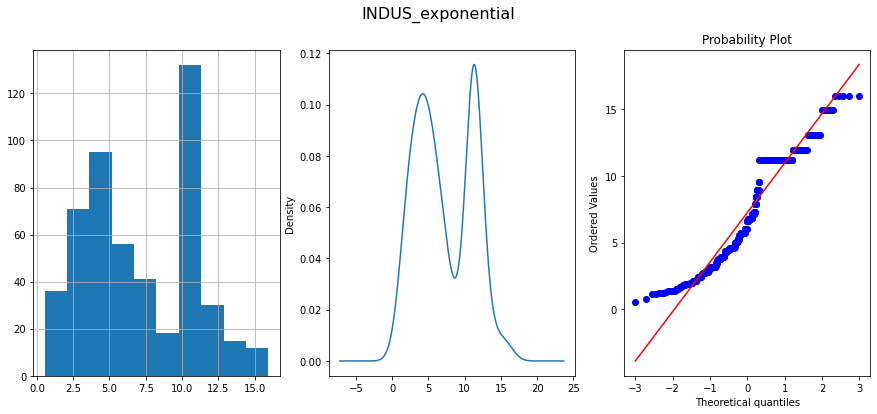

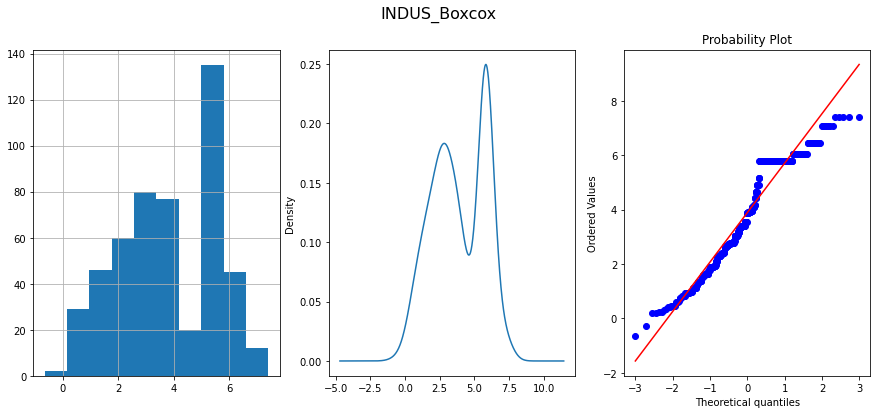

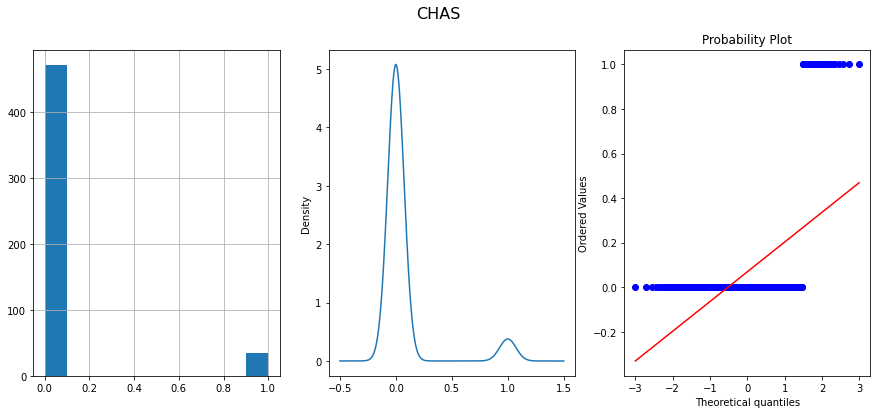

supplied range of [-inf, 0.0] is not finite
supplied range of [1.0, inf] is not finite


/home/hktikhin/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


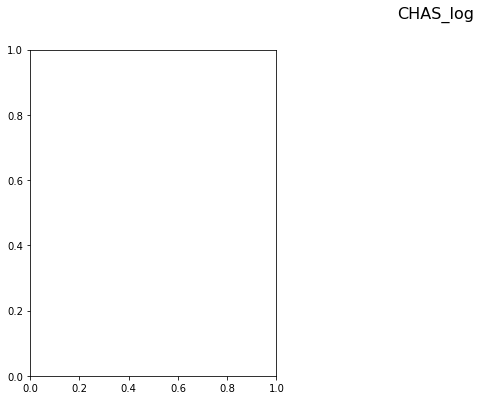

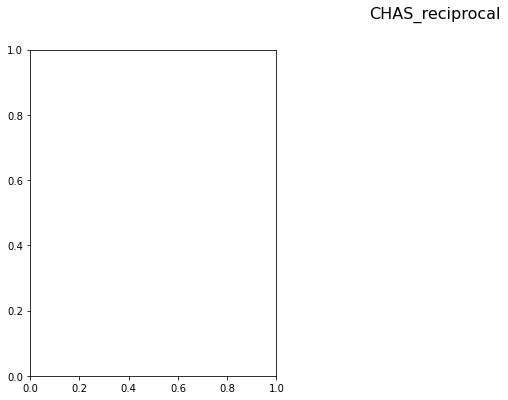

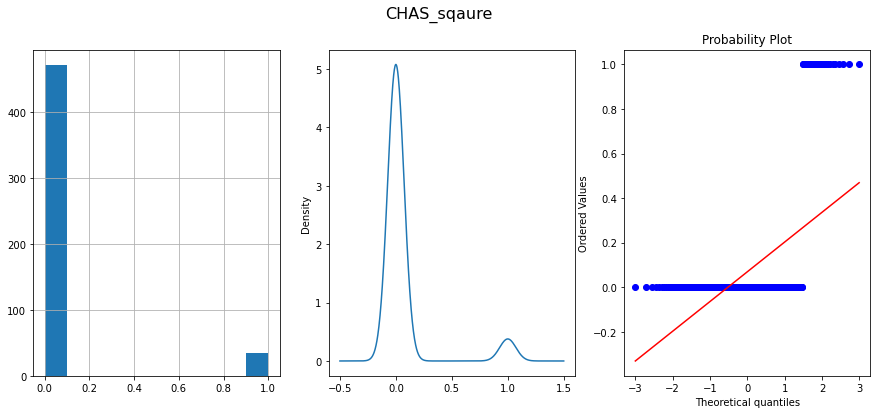

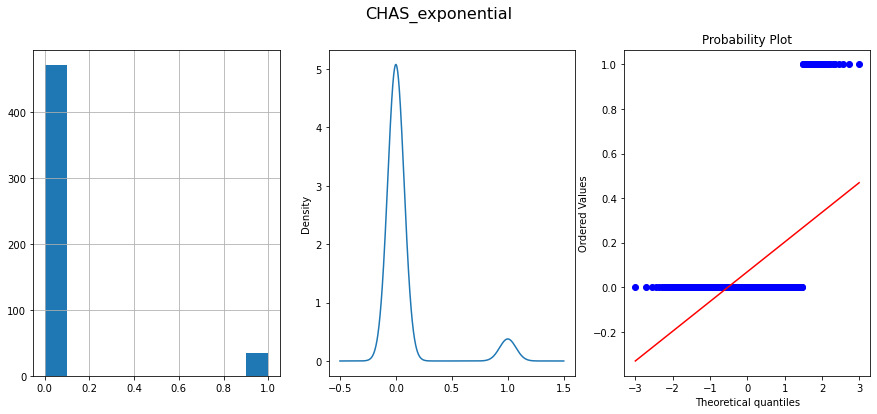

Data must be positive.


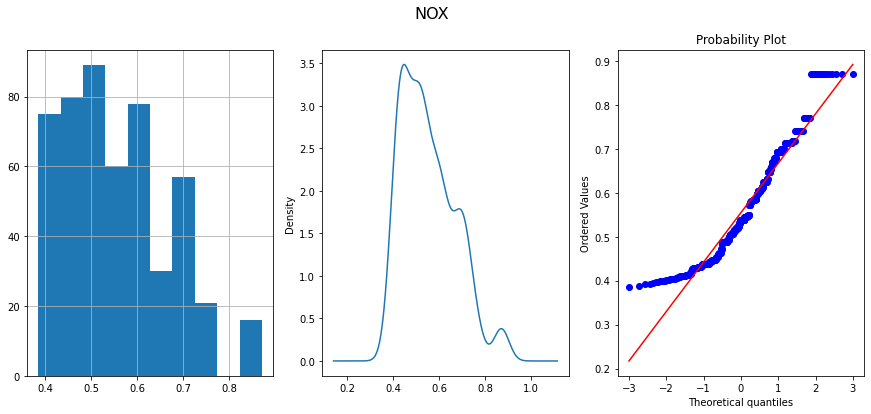

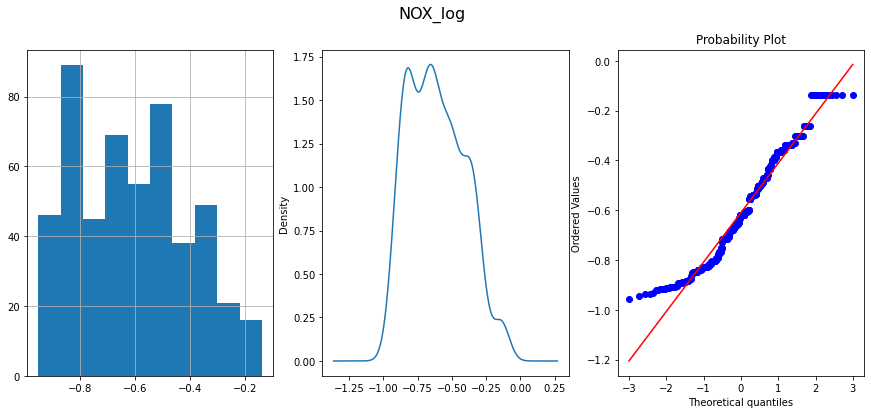

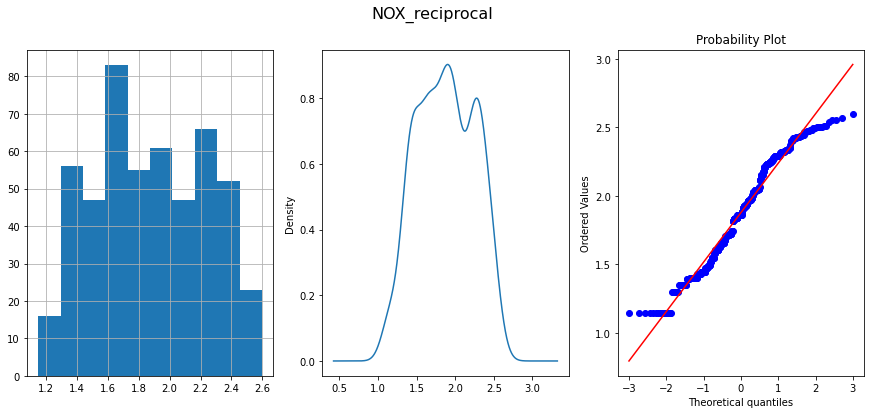

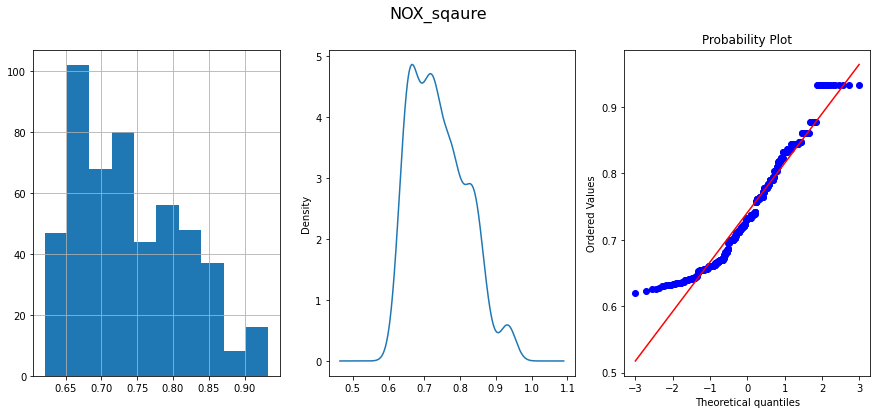

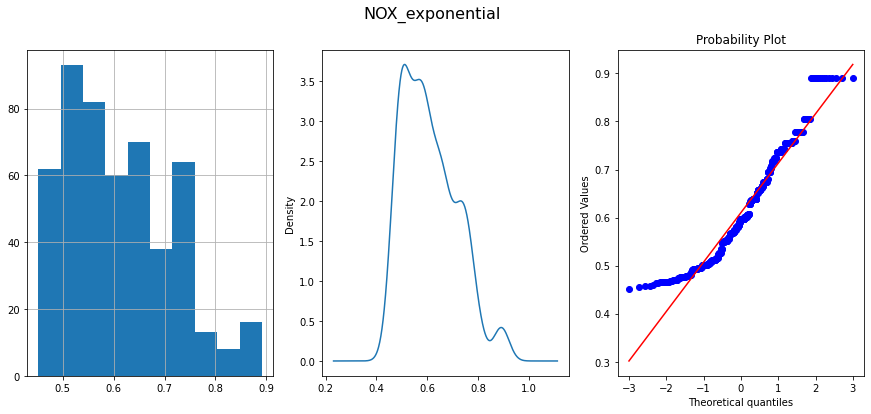

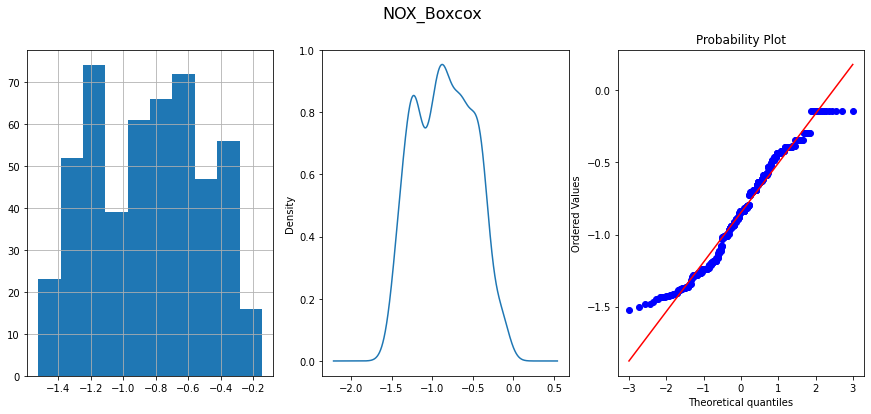

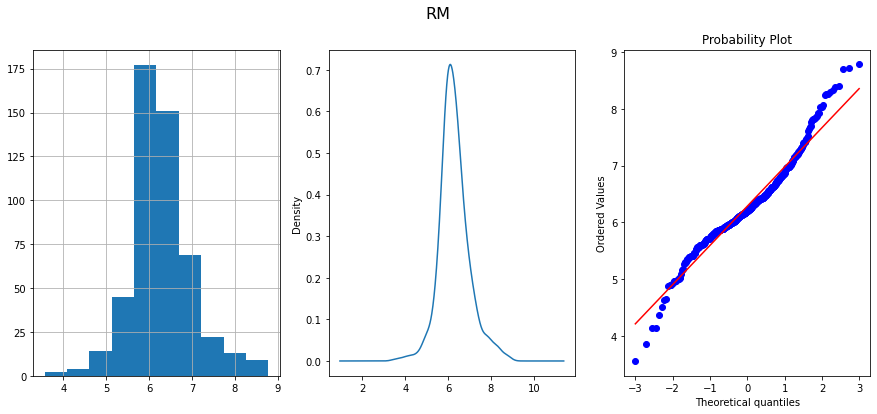

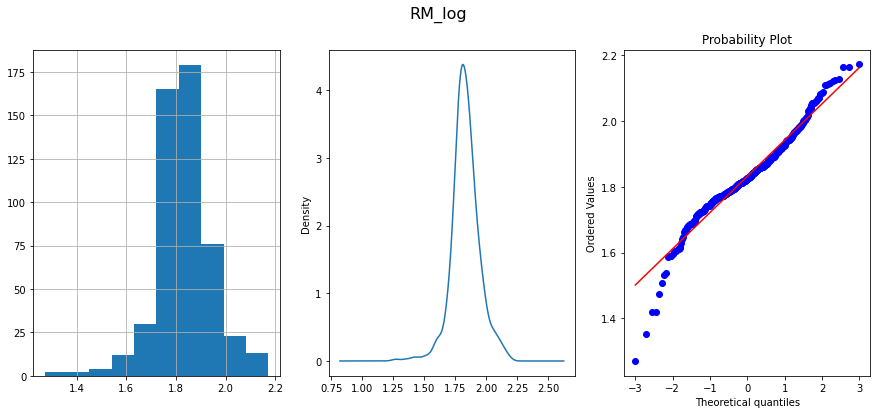

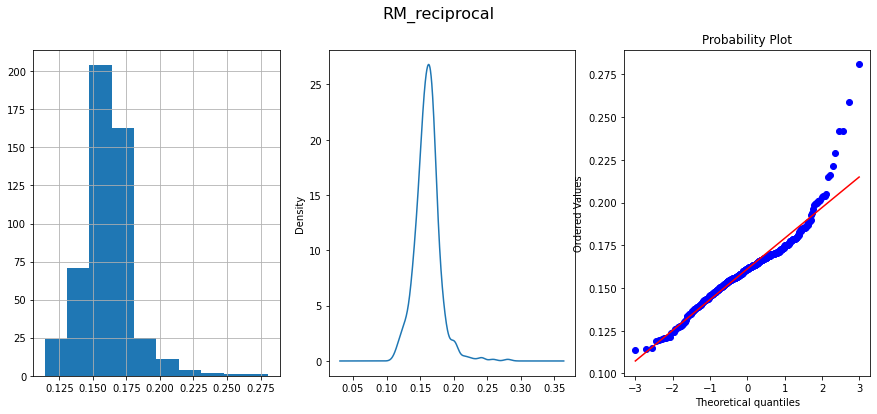

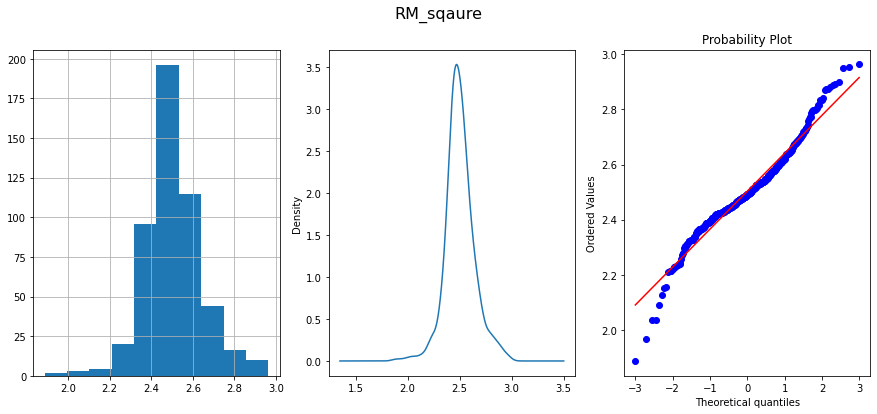

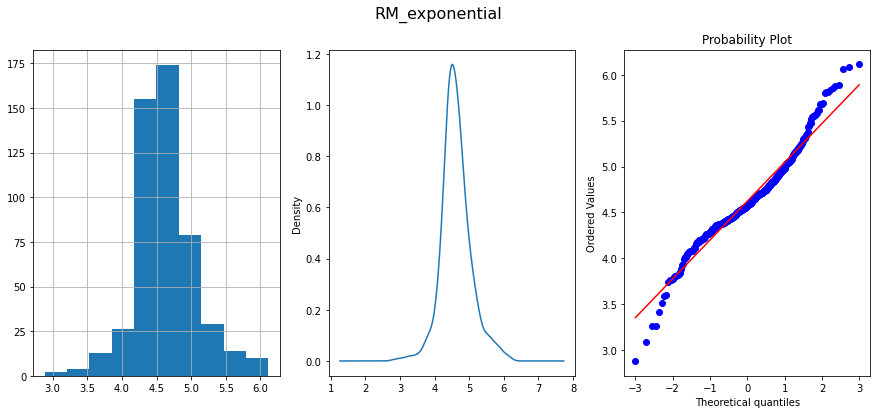

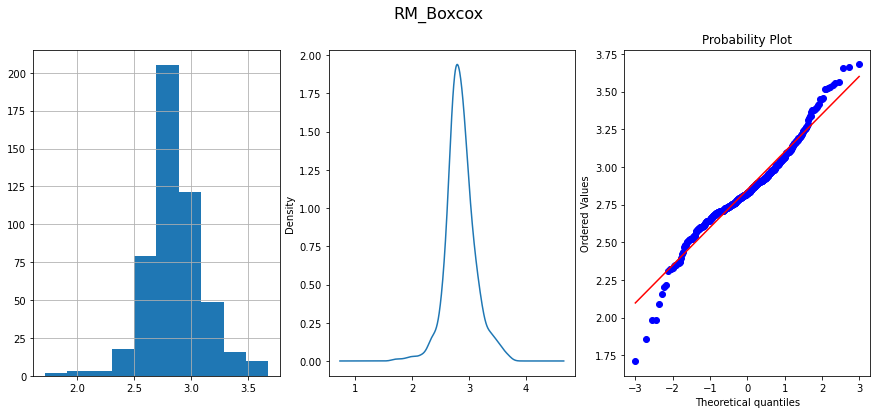

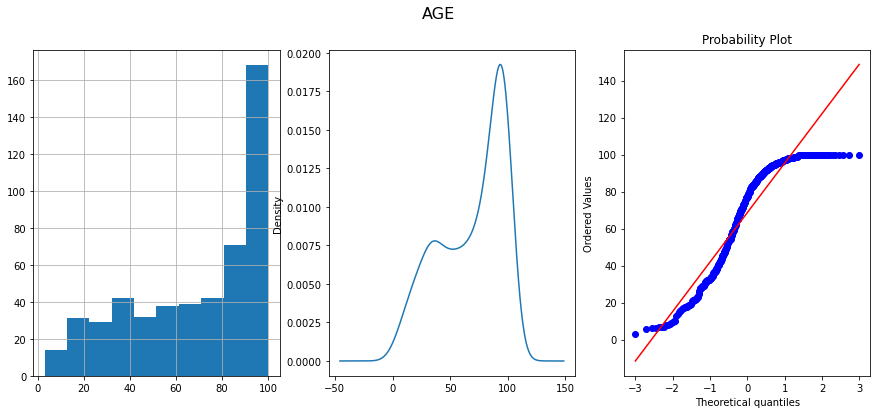

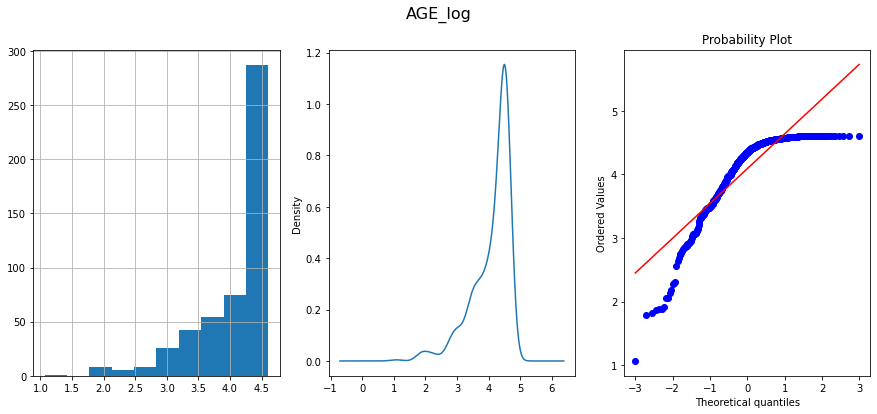

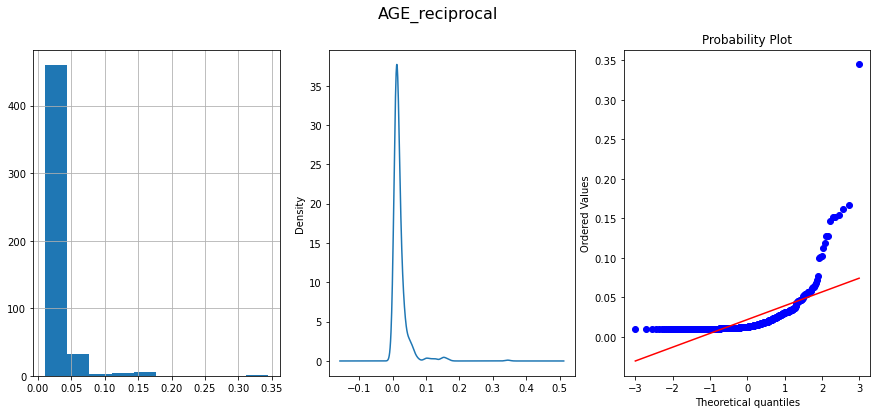

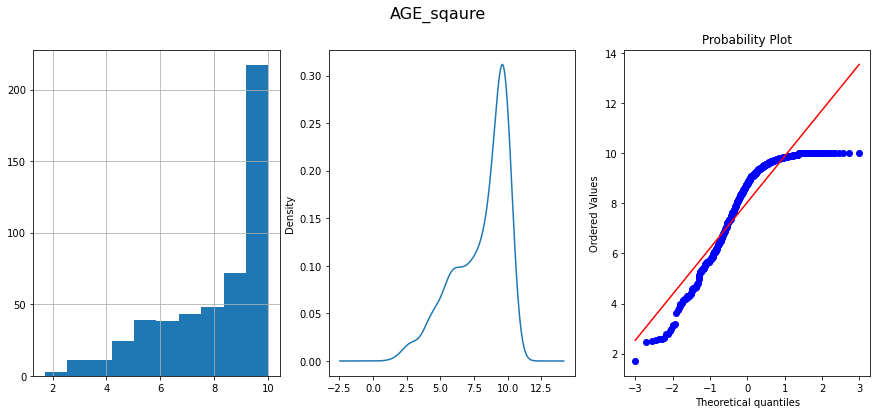

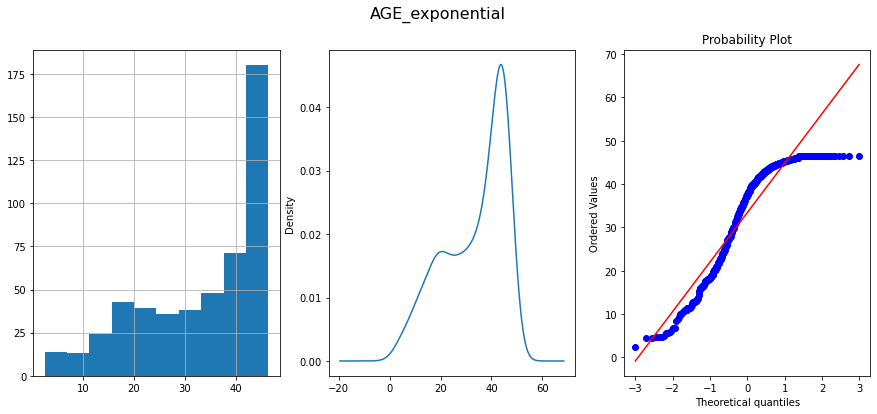

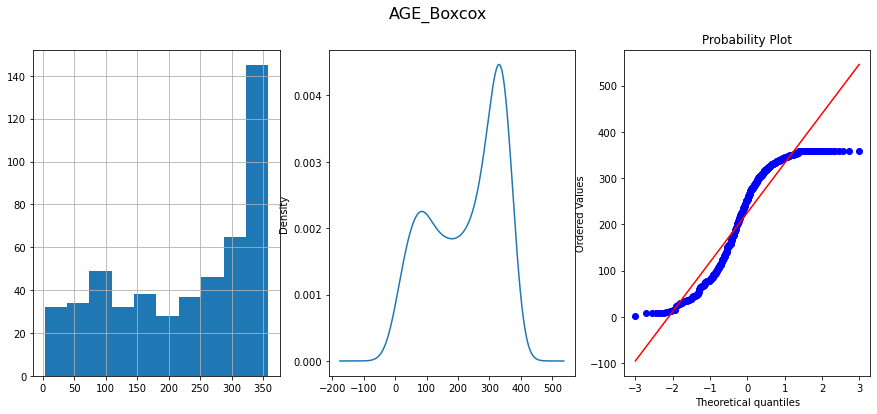

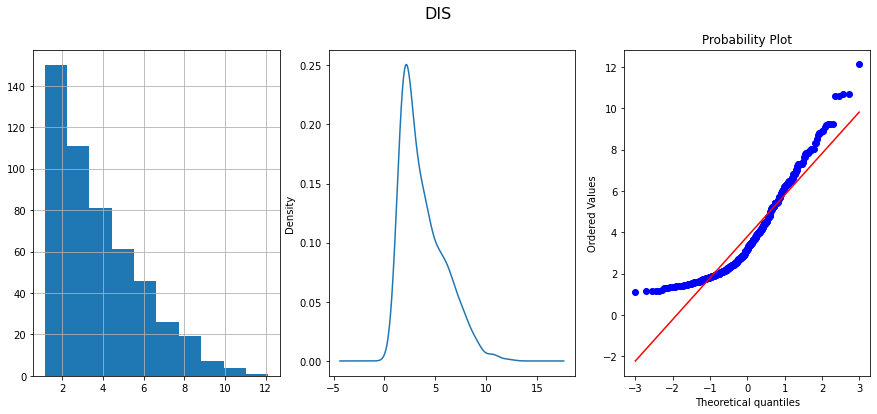

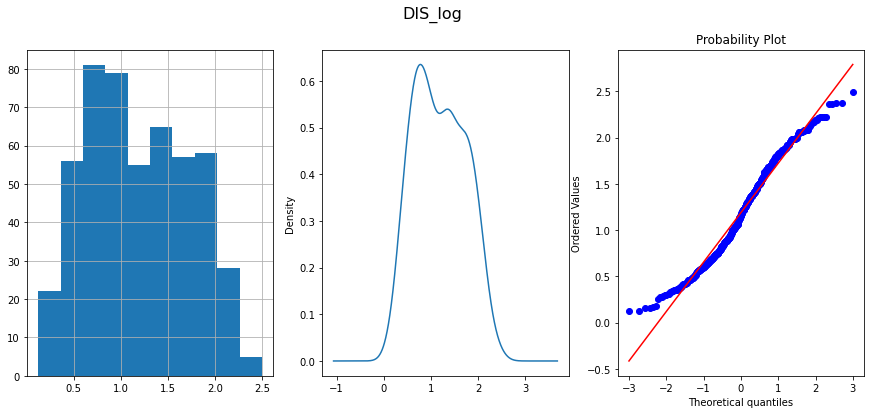

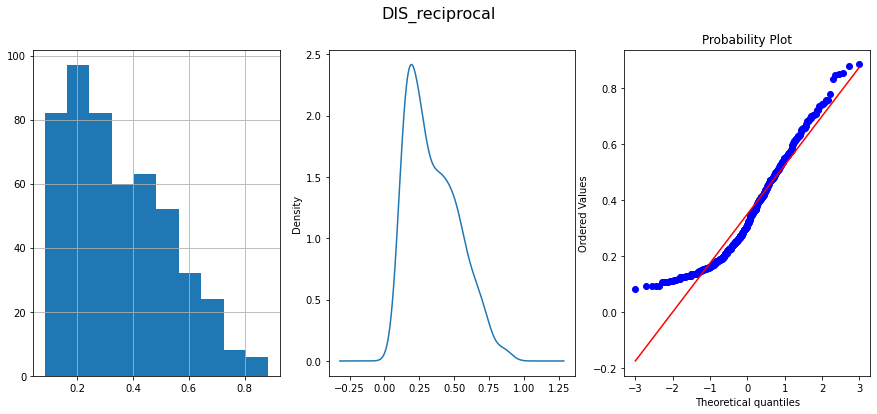

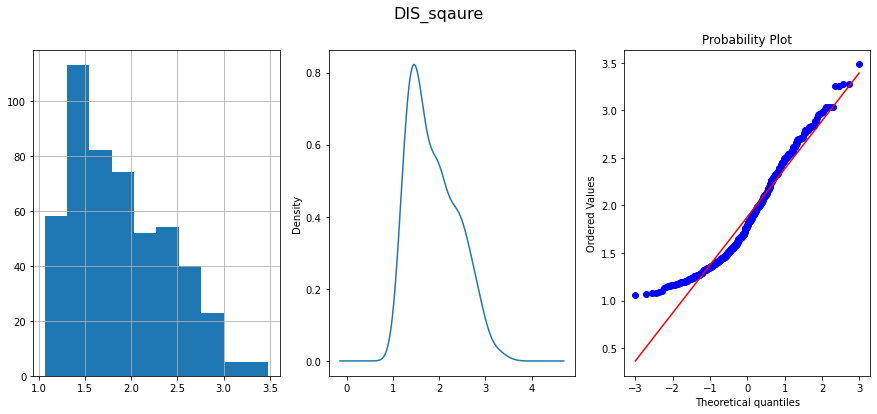

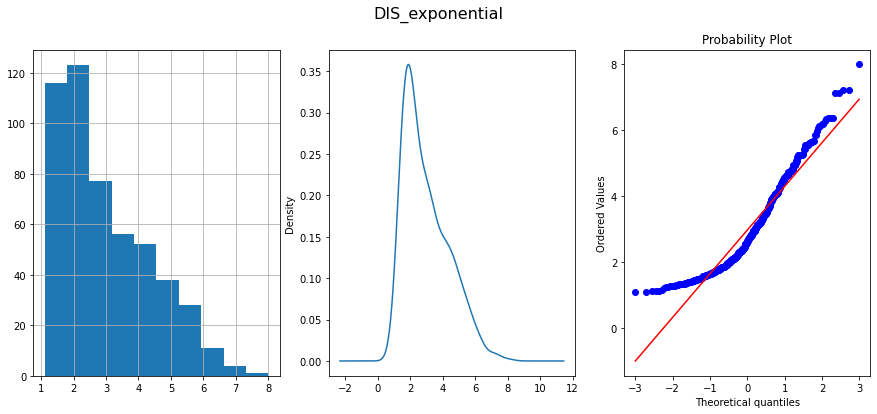

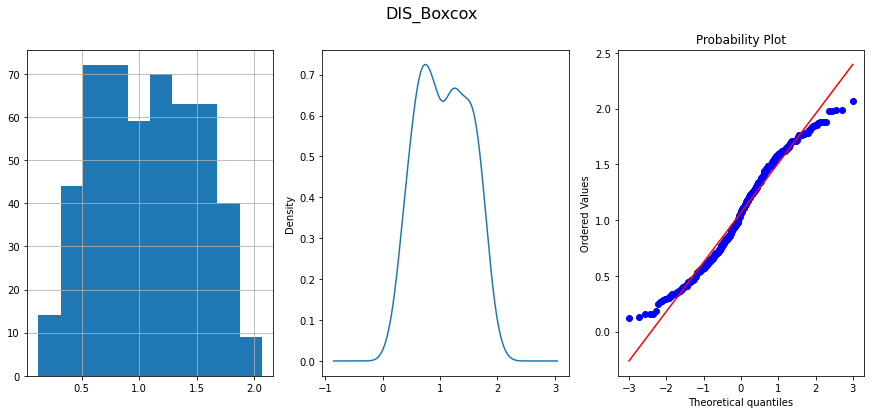

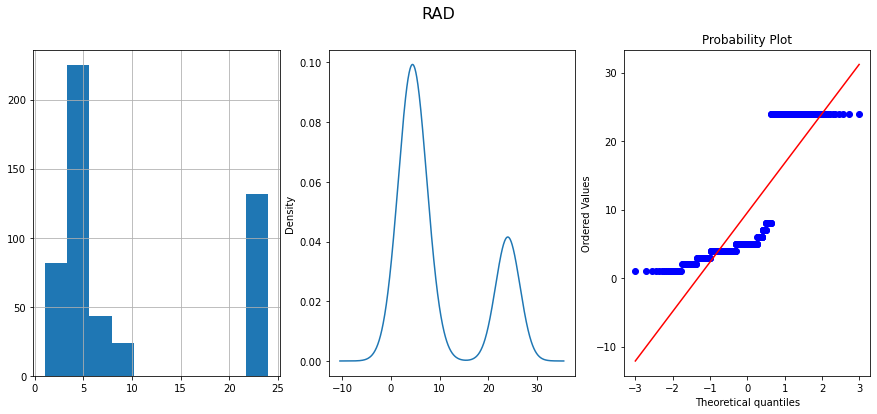

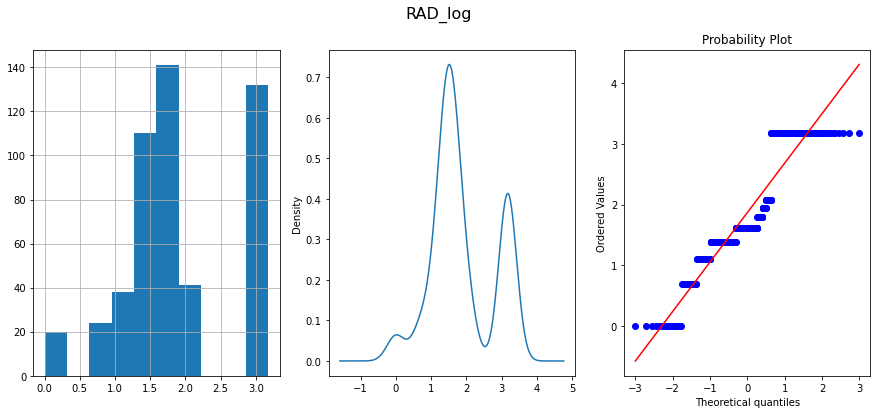

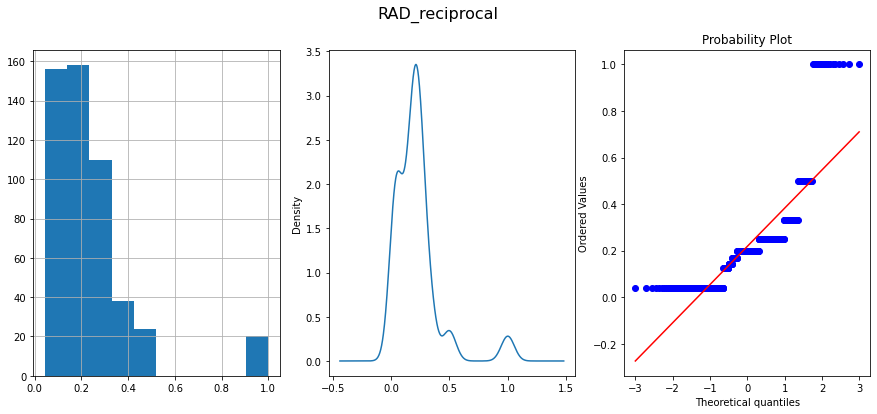

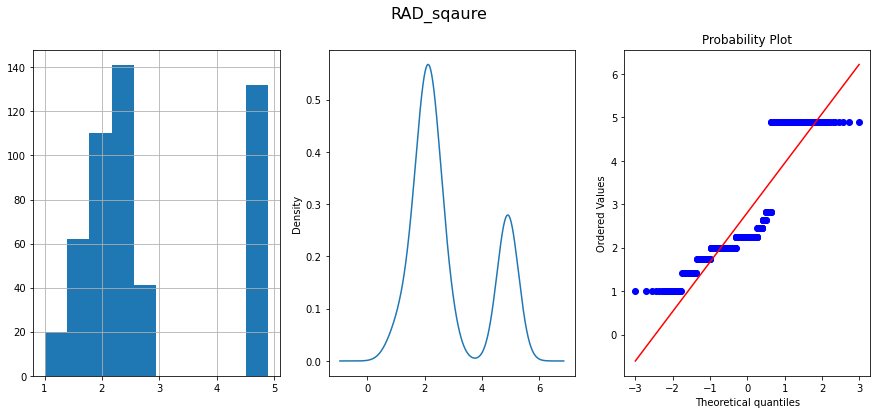

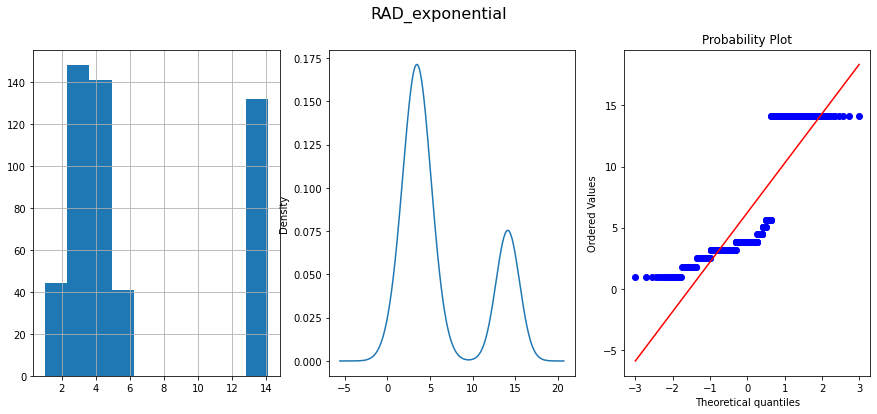

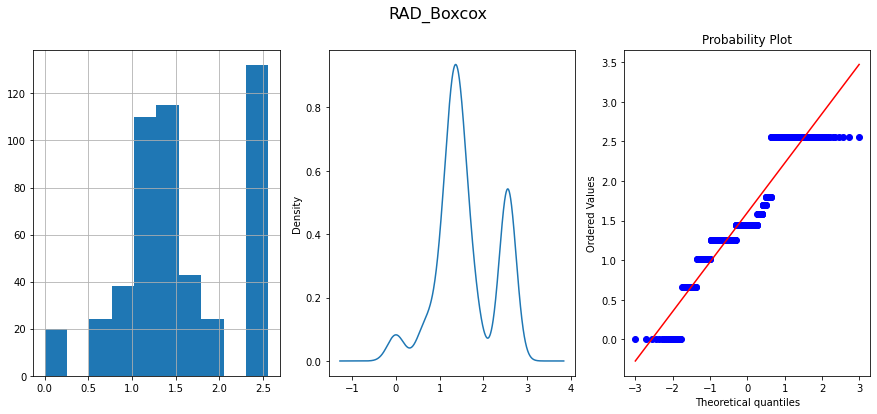

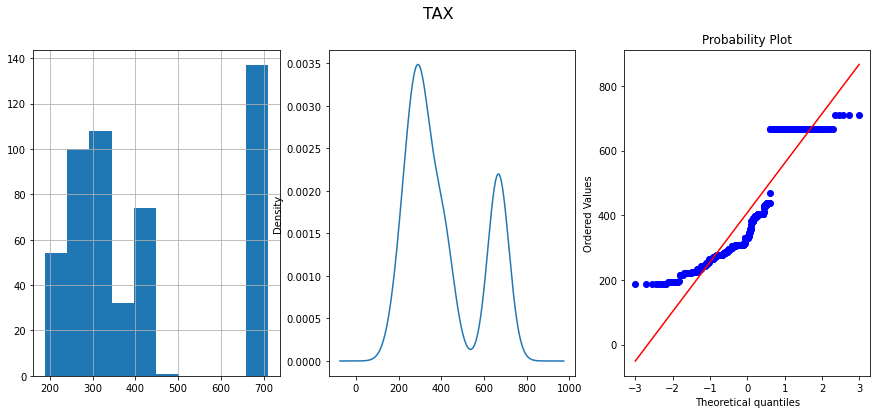

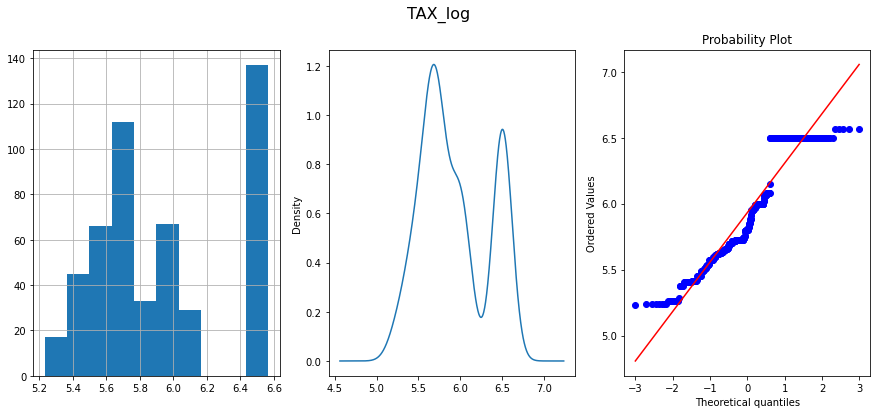

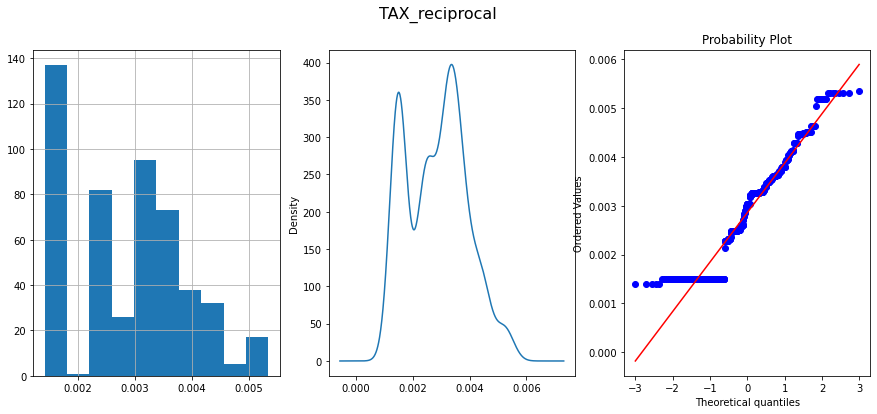

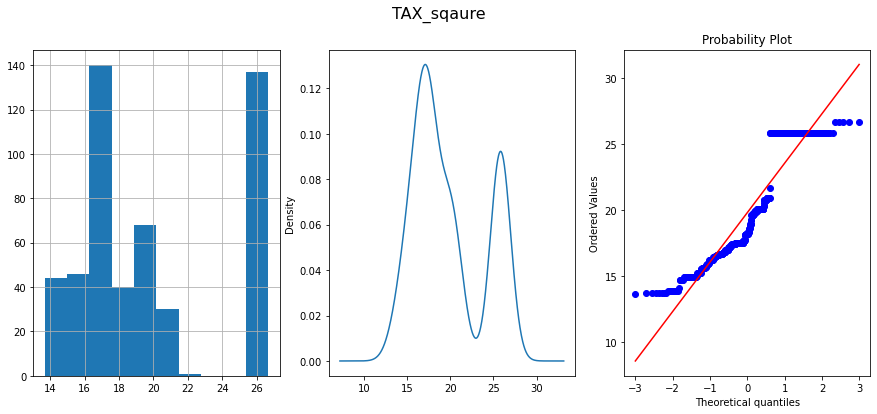

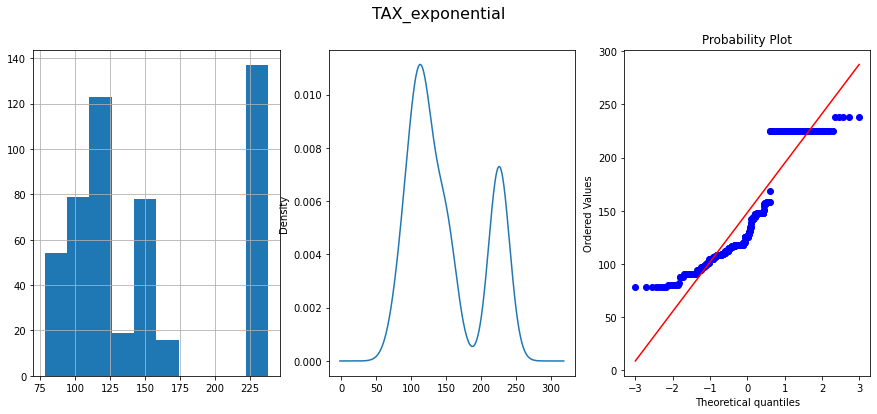

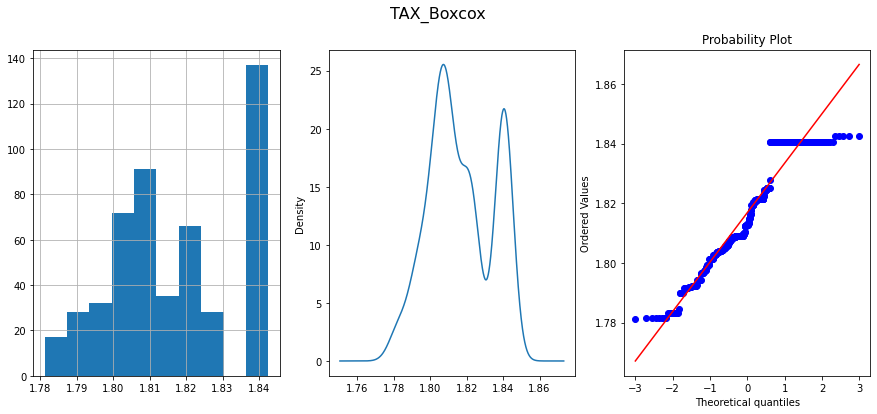

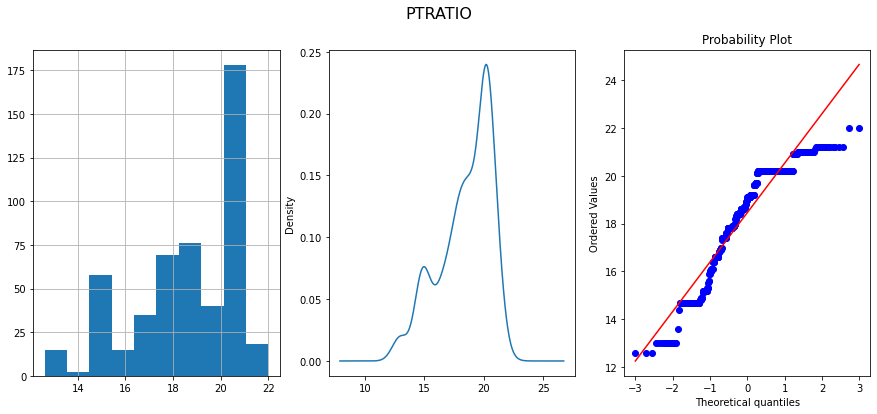

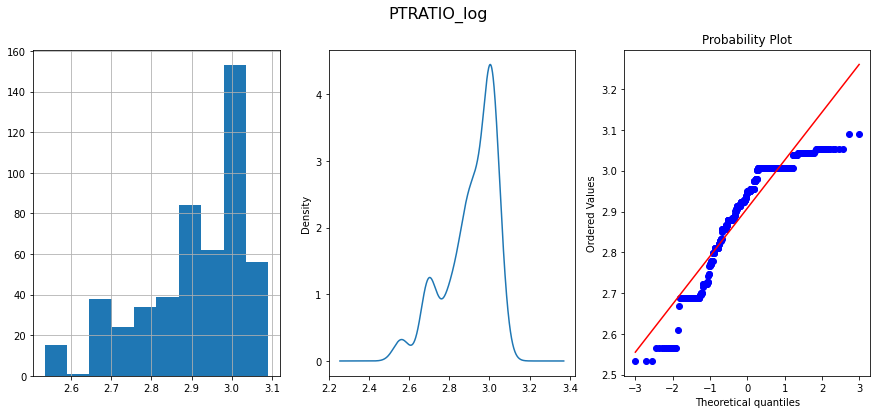

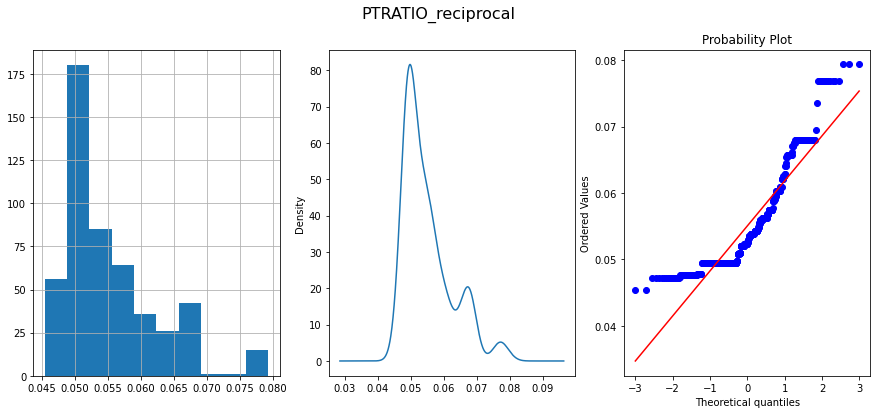

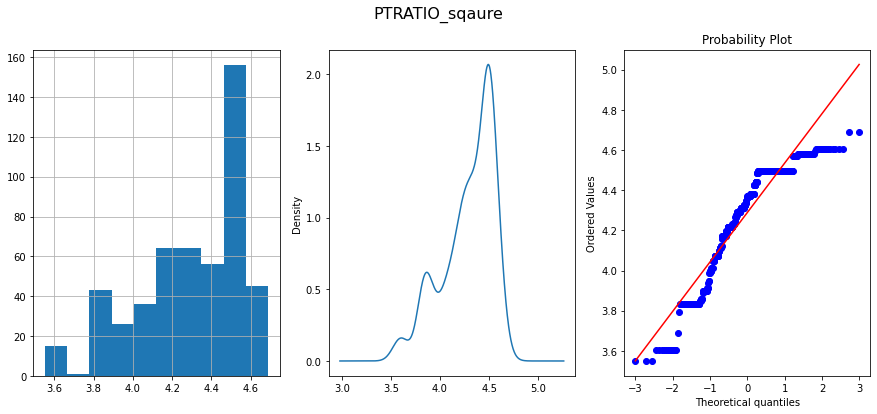

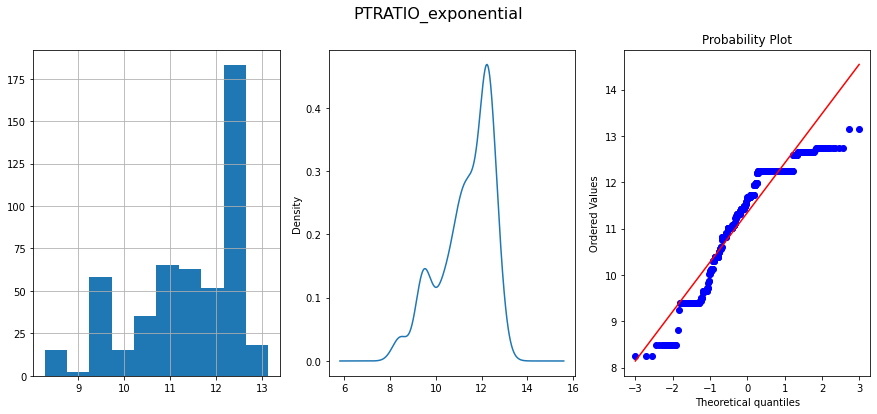

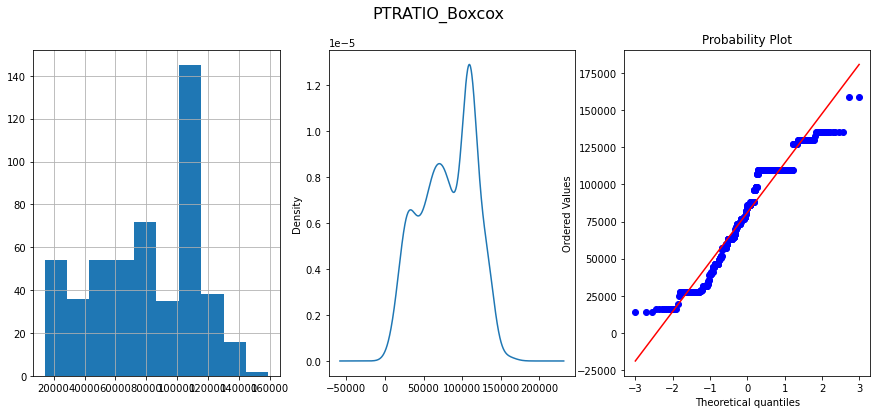

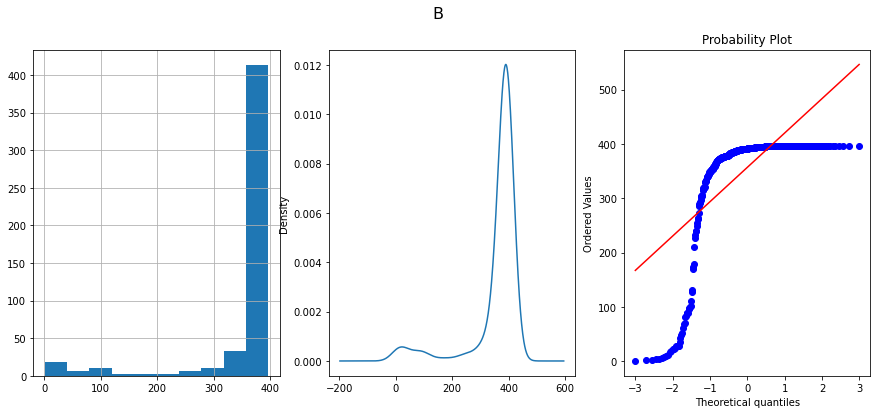

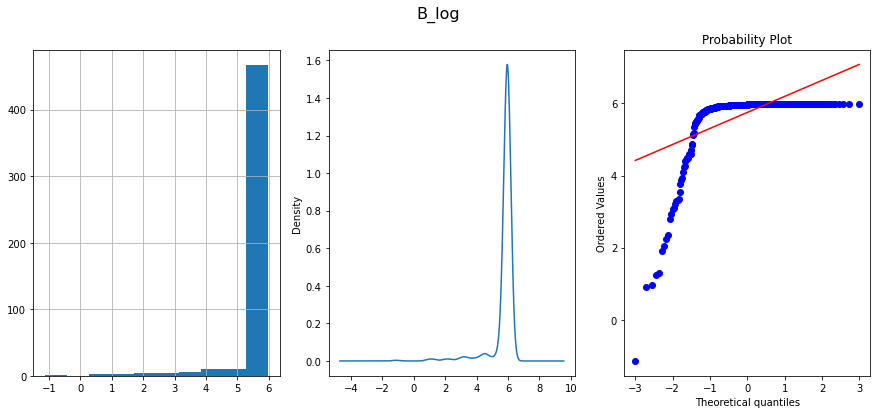

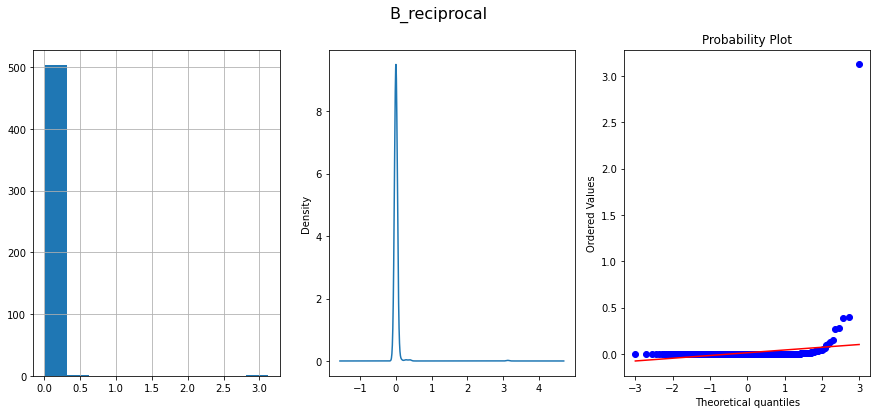

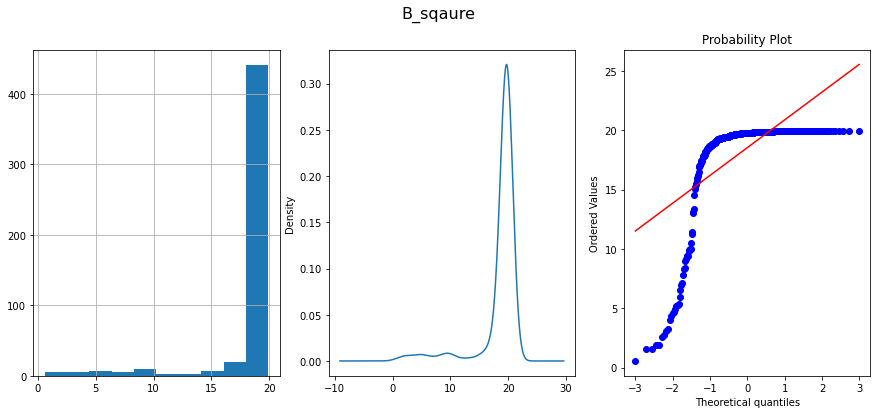

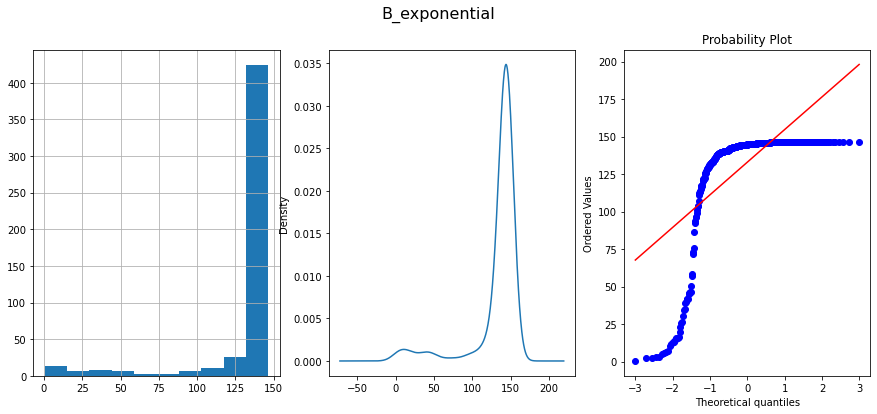

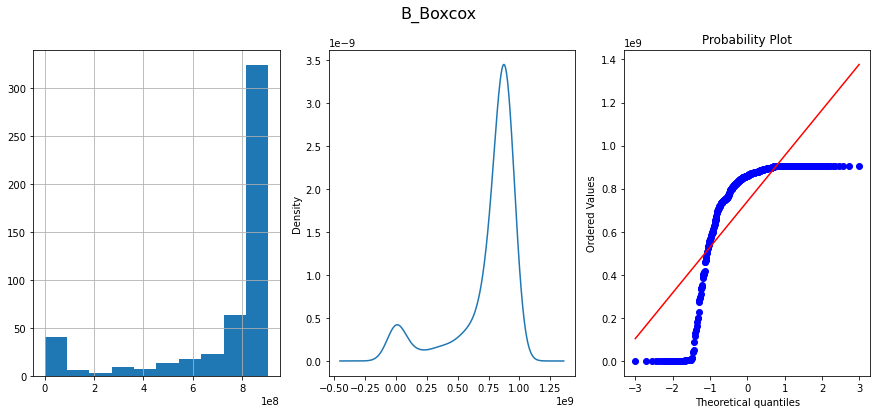

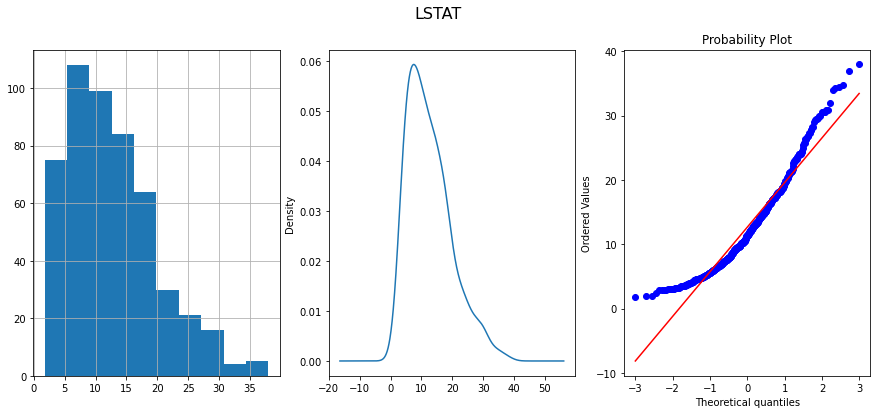

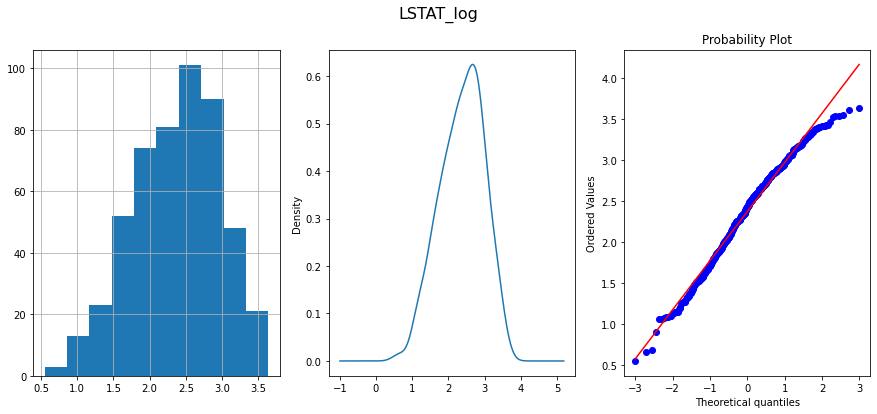

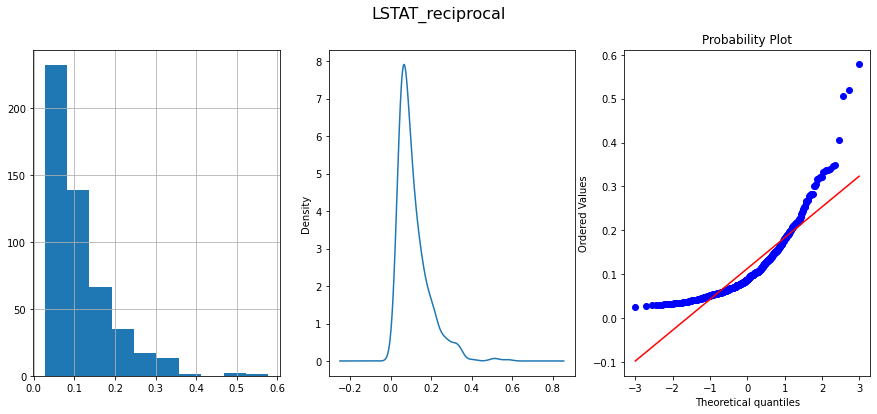

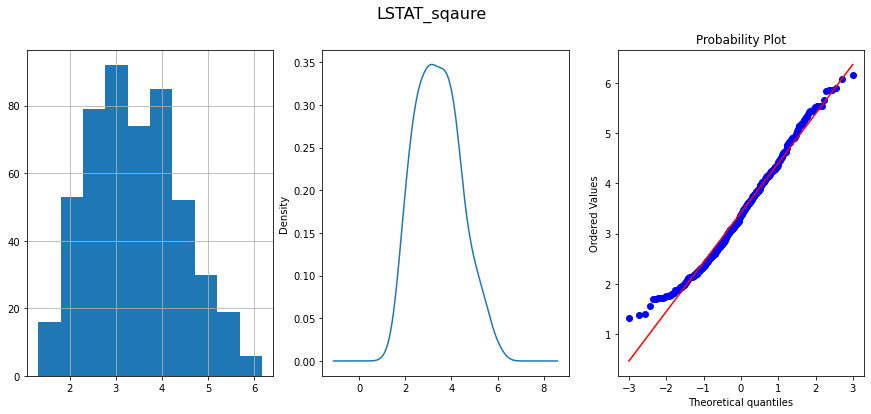

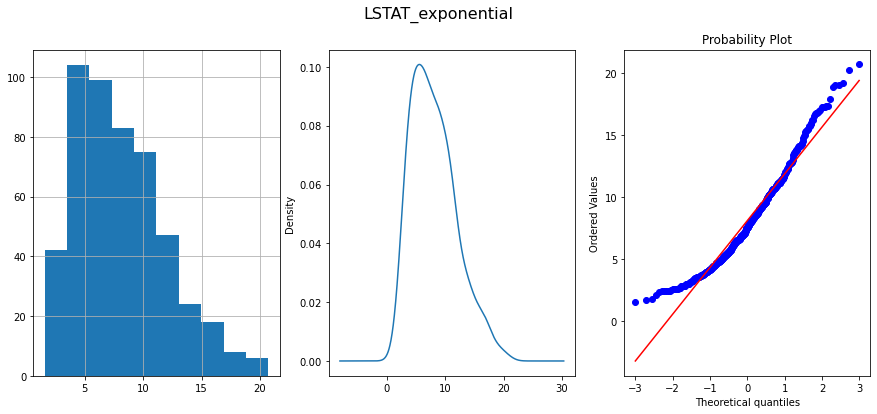

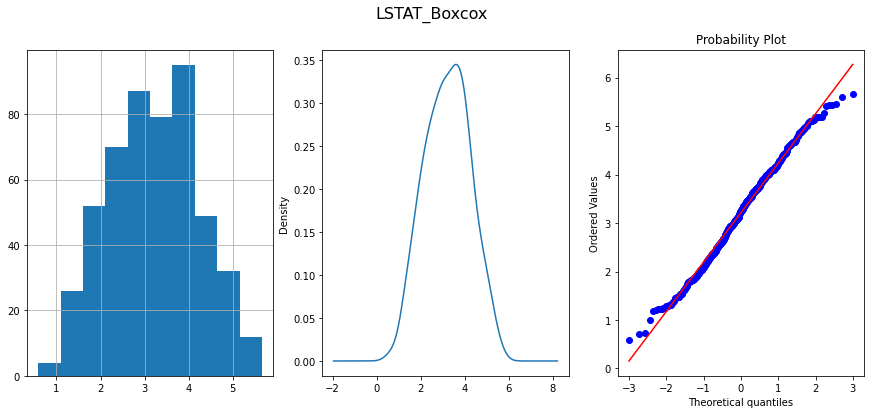

In [9]:
def check_transform(df,feature):
    data = df.copy(deep = True)
    plot_data(bos,feature_name)
    try:
        ## log tranform 
        data[feature+'_log']=np.log(data[feature])
        plot_data(data,feature+'_log')
    except Exception as e:
        print(e)
    ## Reciprocal Trnasformation
    try:
        data[feature + '_reciprocal']=1/data[feature]
        plot_data(data,feature + '_reciprocal')
    except Exception as e:
        print(e)
    ## Square Root Transformation
    data[feature +'_sqaure']=data[feature]**(1/2)
    plot_data(data,feature +'_sqaure')
    ## Exponential Transdormation
    data[feature +'_exponential']=data[feature]**(1/1.2)
    plot_data(data,feature +'_exponential')
    ## BoxCox Transformation
    try:
        data[feature +'_Boxcox'],parameters=stats.boxcox(data[feature])
        plot_data(data,feature +'_Boxcox')
    except Exception as e:
        print(e)
    
for feature_name in bos.columns:
    check_transform(bos,feature_name)

After observing the data, we decide which type of tranformation to use

CRIM -- LOG/BOXCOX

ZN -- NOT USED

INDUS -- NOT USED/BOXCOX

CHAS -- NOT USED

NOX -- BOXCOX 

RM -- NOT USED : QUITE NORMAL 

AGE -- NOT USED 

DIS -- BOXCOX

RAD -- NOT USED // BOXCOX

TAX -- BOXCOX

PTRATIO -- BOXCOX

B -- NOT 

LSTAT -- BOXCOX

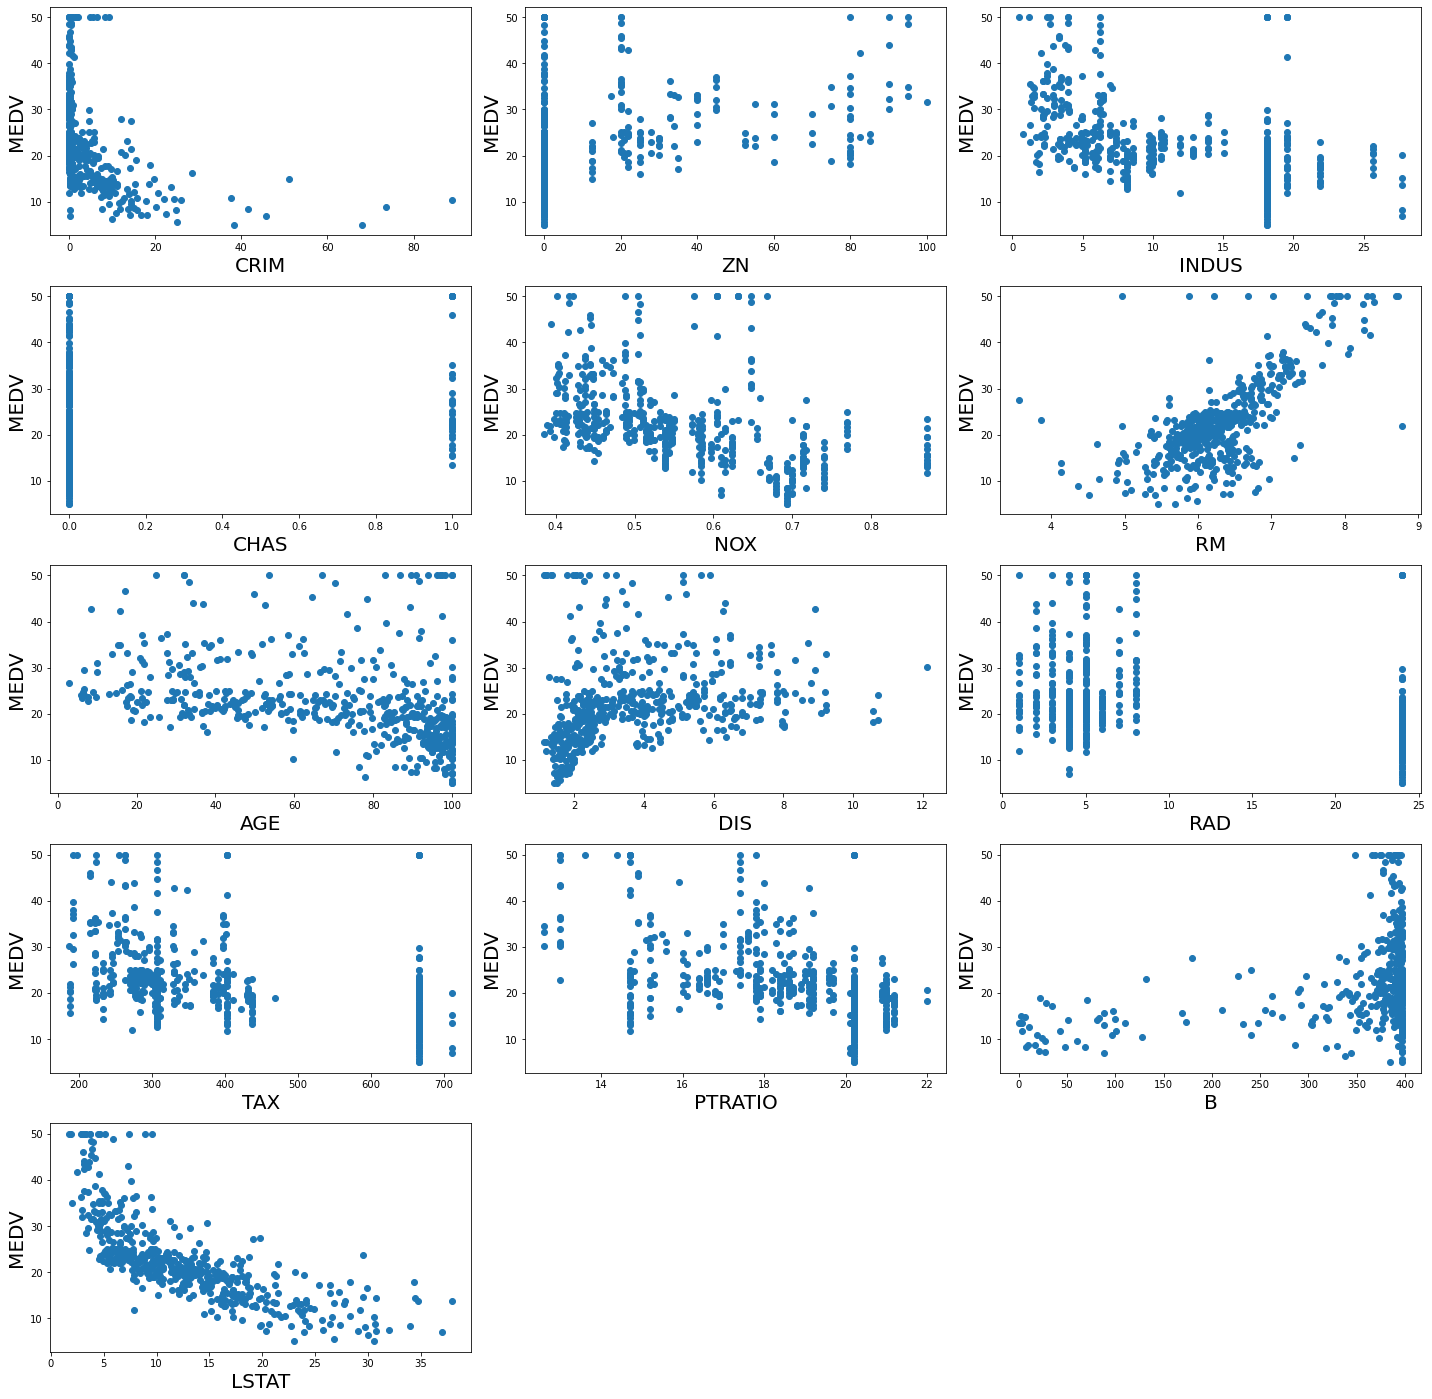

In [10]:
## checking linearity 
plt.figure(figsize=(20,50), facecolor='white')
plotnumber = 1
for column in bos.columns:
    ax = plt.subplot(len(bos.columns),3 , plotnumber)
    plt.scatter(bos[column],y)
    plt.xlabel(column,fontsize=20)
    plt.ylabel('MEDV',fontsize=20)
    plotnumber += 1 
plt.tight_layout()

In [11]:
## check the collinearilty(using vif/correlation matrix)
## first scale down X then find its VIF value 

new_bos = bos.copy(deep = True)

scaler = StandardScaler()

## repeatedly check if vif>5 and drop one col 
while True:
    bos_scaled = scaler.fit_transform(new_bos)

    vif = pd.DataFrame()

    vif["VIF"] = [variance_inflation_factor(bos_scaled, i) for i in range(bos_scaled.shape[1])]
    vif["Features"] = new_bos.columns
    if max(vif["VIF"]) >=5:
        drop_col = vif["Features"][vif["VIF"].idxmax()]
        del new_bos[drop_col]
    else:
        break

In [12]:
new_bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48


In [13]:
## find p-val for the model and drop the col if its pval >.05

import statsmodels.formula.api as smf

while True:
    sm_data = new_bos.copy(deep = True)
    sm_data['MEDV'] = y
    formula = 'MEDV ~'
    for col in new_bos.columns:
        if col == new_bos.columns[-1]:
            formula = formula + ' ' + col
        else: 
            formula = formula + ' ' + col + ' +'
    lm = smf.ols(formula=formula, data=sm_data).fit()
    if max(lm.pvalues) > 0.05:
        del new_bos[lm.pvalues.idxmax()]
    else:
        break
new_bos

,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,15.3,396.90,4.98
1,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,17.8,396.90,9.14
2,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,17.8,392.83,4.03
3,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,18.7,394.63,2.94
4,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.0,0.573,6.593,2.4786,1.0,21.0,391.99,9.67
502,0.04527,0.0,0.0,0.573,6.120,2.2875,1.0,21.0,396.90,9.08
503,0.06076,0.0,0.0,0.573,6.976,2.1675,1.0,21.0,396.90,5.64
504,0.10959,0.0,0.0,0.573,6.794,2.3889,1.0,21.0,393.45,6.48


In [22]:
from sklearn.preprocessing import PowerTransformer
## apply pipline to process data 
from sklearn.pipeline import Pipeline

## first split the data 
X_train,X_test,y_train,y_test = train_test_split(new_bos,y,test_size = 0.25,random_state=2123)

## apply boxcox transformation for certain cols
boxcox_col_lst = ['CRIM', 'INDUS' , 'NOX' , 'DIS' , 'RAD' ,'TAX' , 'PTRATIO' , 'LSTAT' ]

power = PowerTransformer(method='box-cox')
ct = ColumnTransformer([("boxcox", power , [col for col in boxcox_col_lst if col in new_bos.columns ] )],
                 remainder = 'passthrough')

pipe = Pipeline([('boxcox', ct), ('standard_scaling', StandardScaler()),('linear_regression',LinearRegression())])

pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.7794692501036373

In [23]:
## comparing linear regression without tranformation 
regression = LinearRegression()
regression.fit(X_train ,y_train)
regression.score(X_test,y_test)

0.7326355554736541